<a href="https://colab.research.google.com/github/amanpatel59/ML_colab/blob/main/ML_Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import pandas as pd

In [128]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [129]:
df=pd.read_csv('/drive/My Drive/dataset_ML/Placement_Data.csv')

# Data Preprocessing

In [130]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**-> check first four rows of dataframe**

In [131]:
df.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


**-> get all feature names i.e. all column names**

In [132]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**-> find number of records and columns**

In [133]:
print(df.shape[0]) 
print(df.shape[1])
df.shape

215
15


(215, 15)

**-> use the info method to find the number of non null entries and data type of each feature**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**-> what is the average secondary education percentage - 10th grade**

In [135]:
df['ssc_p'].mean()

67.30339534883721

**-> what is the max secondary education percentage - 10th grade**

In [136]:
df['ssc_p'].max()

89.4

**-> how many toppers were there in 10th grade**

In [137]:
len(df[df['ssc_p'] == df['ssc_p'].max()])

1

**-> is the student who got highest secondary education percentage,placed or not?**

In [138]:
df[df['ssc_p'] == df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

**-> how many students are placed or unplaced ?**

In [139]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

**-> which is the most common degree of the placed students?**

In [140]:
df[df['status'] == 'Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

**-> how many unique degrees are there in dataset?**

In [141]:
df['degree_t'].nunique()

3

**-> is there a correlation between 10th and 12th percentage?**

In [142]:
df[['ssc_p','hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


**-> find correlation matrix**

In [143]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


**-> identify the column which can be removed(only 1)**

**-> remove the unnecessary column**

In [144]:
df.drop(columns=['sl_no'] , inplace=True)

In [145]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**-> check number of null values in each column**

In [146]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**-> fill the missing values with appropriate values and check number of null values in each column**

In [147]:
df['salary'].fillna(0,inplace = True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**-> other ways to fill values include**

In [148]:
df['salary'].ffill()

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [149]:
df['salary'].bfill()

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [150]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Data Visualization

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

**-> draw scatter plot between 10th and 12th percentage**

Text(0.5, 1.0, 'scatter plot between 10th and 12th percentage')

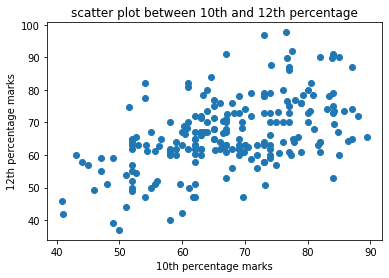

In [152]:
plt.scatter(df['ssc_p'],df['hsc_p'])
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("scatter plot between 10th and 12th percentage")

**-> adding colors in the above graph for more informations**

In [153]:
colors={'Placed': 'tab:green','Not Placed': 'tab:red'}

In [154]:
df['status'].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'scatter plot between 10th and 12th percentage')

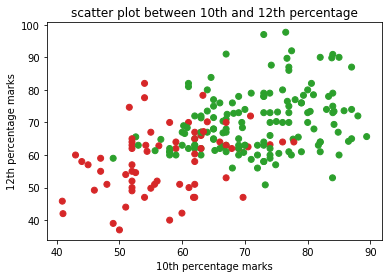

In [155]:
plt.scatter(df['ssc_p'],df['hsc_p'] , c = df['status'].map(colors))
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("scatter plot between 10th and 12th percentage")

**-> draw a pairplots between all continuous columns**

In [ ]:
sns.pairplot(df)

**-> adding hue to add colors**

In [ ]:
sns.pairplot(df,hue='status')

**-> pairplot between particular columns**

In [ ]:
sns.pairplot(df[['ssc_p','hsc_p','degree_p']])

**-> boxplot for 10th percentage of students**

In [ ]:
#can use      sns.boxplot(df['ssc_p'])        too
sns.boxplot(y='ssc_p' , data=df)

**-> boxplot for 12th percentage**

In [ ]:
sns.boxplot(y='hsc_p',data=df)

In [ ]:
sns.boxplot(y='ssc_p',data=df,x='status')

**-> lineplots** (mainly used when we have data related to time period)

In [ ]:
y = [1,2,33,2,1]
plt.plot(y,label='points on Y')
plt.legend()

In [ ]:
plt.plot(df['ssc_p'],label='10th percentage')
plt.plot(df['hsc_p'],label='12th percentage')
plt.legend()

**-> heatmap**

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
plt.hist(df['salary'])

In [ ]:
sns.kdeplot(df['salary'])

# Outlier Analysis

In [ ]:
sns.boxplot(y='degree_p',data=df)

In [ ]:
percentile25 = df['degree_p'].quantile(0.25)
percentile75 = df['degree_p'].quantile(0.75)
iqr = percentile75-percentile25
upperlimit = percentile75 + (1.5*iqr)
lowerlimit = percentile25 - (1.5*iqr)

In [ ]:
df = df[df['degree_p'] < upperlimit]
df = df[df['degree_p'] > lowerlimit]

In [ ]:
sns.boxplot(y='degree_p',data=df)

**-> now similarly remove outliers for [ 'ssc_p' , 'hsc_p' , 'degree_p' , 'etest_p' , 'mba_p' ]**

In [ ]:
cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

In [ ]:
for c in cols:
  plt.figure()
  sns.boxplot(y=c,data=df)

In [ ]:
for c in cols:
  percentile25 = df[c].quantile(0.25)
  percentile75 = df[c].quantile(0.75)
  iqr = percentile75-percentile25
  upperlimit = percentile75 + (1.5*iqr)
  lowerlimit = percentile25 - (1.5*iqr)
  df = df[df[c] < upperlimit]
  df = df[df[c] > lowerlimit]
  plt.figure()
  sns.boxplot(y=c,data=df)

In [ ]:
df

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit_transform(df['ssc_b'])

In [ ]:
df['ssc_b'] = le.fit_transform(df['ssc_b'])

In [ ]:
df.info()

In [ ]:
cols = ['hsc_b','gender','hsc_s','degree_t','workex','specialisation','status']

In [ ]:
for i in cols:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

#Linear Regression

In [ ]:
x = df.iloc[:,0:-2]
x.head()

In [ ]:
x = df.iloc[:,0:-2].values
x

In [ ]:
y = df.iloc[:,-1].values
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.transform(x_test)

In [ ]:
x_train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
y_predicted = lr.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,y_predicted)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_predicted))

In [ ]:
metrics.r2_score(y_test,y_predicted)

#Logistic Regression

In [ ]:
df.head()

**-> extracting independent and dependent(status) variable**

In [ ]:
x = df.iloc[:,:-2].values
x

In [ ]:
#y = df.iloc[:,-2].values     can also be used
y = df["status"].values
y

**->splitting data into training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

**-> use standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_train

In [ ]:
x_test = sc.transform(x_test)

**-> build logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred = lr.predict(x_test)

**-> creating a confusion matrix and drawing the heat map for it**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)